<a href="https://colab.research.google.com/github/jonmarks12/Cheminformatics/blob/main/Exploring_Boltz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring Affinity Predictions with Boltz-2

This is a simple notebook I am using to explore what can be done with Boltz-2, from learning the basics of the model, to interfacing it with large datasets. Any reccomendations or advice are welcome, email me at jonahmarks22@gmail.com!

#### Sources used:
**Boltz-2:**

1.   https://github.com/jwohlwend/boltz
2.   https://rowansci.com/blog/how-to-run-boltz-2

**CHEMBL:**

1.   https://github.com/chembl/chembl_webresource_client/tree/master



In [8]:
# install boltz-2
!pip install boltz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.3/266.3 kB 11.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.4/114.4 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 392.5/392.5 kB 21.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.2/267.2 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 90.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━

In [1]:
import boltz
import json

In [ ]:
#example yaml text
yaml_text = """version: 1  # Optional, defaults to 1
sequences:
  - protein:
      id: A
      sequence: MVTPEGNVSLVDESLLVGVTDEDRAVRSAHQFYERLIGLWAPAVMEAAHELGVFAALAEAPADSGELARRLDCDARAMRVLLDALYAYDVIDRIHDTNGFRYLLSAEARECLLPGTLFSLVGKFMHDINVAWPAWRNLAEVVRHGARDTSGAESPNGIAQEDYESLVGGINFWAPPIVTTLSRKLRASGRSGDATASVLDVGCGTGLYSQLLLREFPRWTATGLDVERIATLANAQALRLGVEERFATRAGDFWRGGWGTGYDLVLFANIFHLQTPASAVRLMRHAAACLAPDGLVAVVDQIVDADREPKTPQDRFALLFAASMTNTGGGDAYTFQEYEEWFTAAGLQRIETLDTPMHRILLARRATEPSAVPEGQASENLYFQ
  - ligand:
      id: B
      smiles: 'N[C@@H](Cc1ccc(O)cc1)C(=O)O'
properties:
  - affinity:
      binder: B
"""
print(yaml_text)
with open("example.yaml",'w') as f:
  f.write(yaml_text)

version: 1  # Optional, defaults to 1
sequences:
  - protein:
      id: A
      sequence: MVTPEGNVSLVDESLLVGVTDEDRAVRSAHQFYERLIGLWAPAVMEAAHELGVFAALAEAPADSGELARRLDCDARAMRVLLDALYAYDVIDRIHDTNGFRYLLSAEARECLLPGTLFSLVGKFMHDINVAWPAWRNLAEVVRHGARDTSGAESPNGIAQEDYESLVGGINFWAPPIVTTLSRKLRASGRSGDATASVLDVGCGTGLYSQLLLREFPRWTATGLDVERIATLANAQALRLGVEERFATRAGDFWRGGWGTGYDLVLFANIFHLQTPASAVRLMRHAAACLAPDGLVAVVDQIVDADREPKTPQDRFALLFAASMTNTGGGDAYTFQEYEEWFTAAGLQRIETLDTPMHRILLARRATEPSAVPEGQASENLYFQ
  - ligand:
      id: B
      smiles: 'N[C@@H](Cc1ccc(O)cc1)C(=O)O'
properties:
  - affinity:
      binder: B



In [ ]:
!boltz predict example.yaml --use_msa_server

MSA server enabled: https://api.colabfold.com
MSA server authentication: no credentials provided
Extracting the CCD data to /root/.boltz/mols. This may take a bit of time. You may change the cache directory with the --cache flag.
Checking input data.
Processing 1 inputs with 1 threads.
  0% 0/1 [00:00<?, ?it/s]Generating MSA for example.yaml with 1 protein entities.
Calling MSA server for target example with 1 sequences
MSA server URL: https://api.colabfold.com
MSA pairing strategy: greedy
No authentication provided for MSA server

  0% 0/150 [00:00<?, ?it/s]
SUBMIT:   0% 0/150 [00:00<?, ?it/s]
COMPLETE:   0% 0/150 [00:00<?, ?it/s]
COMPLETE: 100% 150/150 [00:02<00:00, 62.59it/s] 
100% 1/1 [00:02<00:00,  2.95s/it]
Using bfloat16 Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Running structure prediction for 1 input.
/usr/local/lib/python3.11/dist-packages/pytorch_lightning/utilities/migr

In [ ]:
!ls boltz_results_example/predictions/example/

affinity_example.json		 pde_example_model_0.npz
confidence_example_model_0.json  plddt_example_model_0.npz
example_model_0.cif		 pre_affinity_example.npz
pae_example_model_0.npz


In [ ]:
with open('boltz_results_example/predictions/example/affinity_example.json', 'r') as f:
    data = json.load(f)

print(data)

{'affinity_pred_value': 2.4515039920806885, 'affinity_probability_binary': 0.42169877886772156, 'affinity_pred_value1': 2.642098903656006, 'affinity_probability_binary1': 0.37582582235336304, 'affinity_pred_value2': 2.260909080505371, 'affinity_probability_binary2': 0.4675717353820801}


Randomly sample smiles from CHEMBL and run affinity calcs

In [13]:
PROTEIN_ID = "A"
PROTEIN_SEQUENCE = """MVTPEGNVSLVDESLLVGVTDEDRAVRSAHQFYERLIGLWAPAVMEAAHELGVFAALAEAPADSGELARRLDCDARAMRVLLDALYAYDVIDRIHDTNGFRYLLSAEARECLLPGTLFSLVGKFMHDINVAWPAWRNLAEVVRHGARDTSGAESPNGIAQEDYESLVGGINFWAPPIVTTLSRKLRASGRSGDATASVLDVGCGTGLYSQLLLREFPRWTATGLDVERIATLANAQALRLGVEERFATRAGDFWRGGWGTGYDLVLFANIFHLQTPASAVRLMRHAAACLAPDGLVAVVDQIVDADREPKTPQDRFALLFAASMTNTGGGDAYTFQEYEEWFTAAGLQRIETLDTPMHRILLARRATEPSAVPEGQASENLYFQ"""
N_LIGANDS = 25
BATCH_NAME = "chembl_batch"
USE_MSA_SERVER = True

import os, json, time, random, textwrap, subprocess, pathlib, itertools
from pathlib import Path
import requests
import pandas as pd
import matplotlib.pyplot as plt

outroot = Path(f"boltz_runs_{BATCH_NAME}").resolve()
outroot.mkdir(exist_ok=True)


In [14]:
!pip install chembl_webresource_client

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.4/69.4 kB 5.7 MB/s eta 0:00:00


In [30]:
from chembl_webresource_client.new_client import new_client
import pandas as pd

molecule = new_client.molecule
mols = molecule.filter(molecule_type='Small molecule').only(['molecule_chembl_id', 'molecule_structures', 'molecule_properties'])[:5]
filtered_mols = []
for mol in mols:
  temp = {'molecule_chembl_id': mol['molecule_chembl_id']}
  if 'canonical_smiles' in mol['molecule_structures']:
    temp['canonical_smiles'] = mol['molecule_structures']['canonical_smiles']
  if 'full_mwt' in mol['molecule_properties']:
    temp['full_mwt'] = mol['molecule_properties']['full_mwt']
  filtered_mols.append(temp)
df = pd.DataFrame(filtered_mols)
df.head()

,molecule_chembl_id,canonical_smiles,full_mwt
0,CHEMBL6329,Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccccc1Cl,341.75
1,CHEMBL6328,Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccc(C#N)cc1,332.32
2,CHEMBL265667,Cc1cc(-n2ncc(=O)[nH]c2=O)cc(C)c1C(O)c1ccc(Cl)cc1,357.80
3,CHEMBL6362,Cc1ccc(C(=O)c2ccc(-n3ncc(=O)[nH]c3=O)cc2)cc1,307.31
4,CHEMBL267864,Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccc(Cl)cc1,341.75


In [32]:
def yaml_for_smiles(smiles, ligand_id="B", protein_id=PROTEIN_ID, protein_seq=PROTEIN_SEQUENCE):
    return f"""version: 1
sequences:
  - protein:
      id: {protein_id}
      sequence: {protein_seq}
  - ligand:
      id: {ligand_id}
      smiles: '{smiles}'
properties:
  - affinity:
      binder: {ligand_id}
"""

yaml_dir = outroot / "yamls"
yaml_dir.mkdir(parents=True, exist_ok=True)

jobs = []
for i, row in df.reset_index(drop=True).iterrows():
    cid = row["molecule_chembl_id"][6:]
    smi = row["canonical_smiles"]
    job_name = f"cid_{cid}"
    yaml_path = yaml_dir / f"{job_name}.yaml"
    with open(yaml_path, "w") as f:
        f.write(yaml_for_smiles(smi))
    jobs.append({"name": job_name, "cid": int(cid), "smiles": smi, "yaml": str(yaml_path)})
len(jobs)


5

In [ ]:
def run_boltz_job(job, use_msa_server=USE_MSA_SERVER):
    yaml_path = job["yaml"]
    cmd = ["boltz", "predict", yaml_path]
    if use_msa_server:
        cmd.append("--use_msa_server")
    print("Running:", " ".join(cmd))
    subprocess.run(cmd, check=True)

for j in jobs:
    try:
        run_boltz_job(j)
    except subprocess.CalledProcessError as e:
        print(f"[WARN] Job failed for {j['name']}: {e}")


Running: boltz predict /content/boltz_runs_chembl_batch/yamls/cid_6329.yaml --use_msa_server
Running: boltz predict /content/boltz_runs_chembl_batch/yamls/cid_6328.yaml --use_msa_server
Running: boltz predict /content/boltz_runs_chembl_batch/yamls/cid_265667.yaml --use_msa_server


In [ ]:
def find_affinity_json_for_job(job):
    pattern = f"**/predictions/{job['name']}/affinity_{job['name']}.json"
    matches = list(pathlib.Path.cwd().glob(pattern))
    return matches[0] if matches else None

records = []
missing = []

for j in jobs:
    res_path = find_affinity_json_for_job(j)
    if not res_path:
        missing.append(j["name"])
        continue
    try:
        with open(res_path, "r") as f:
            payload = json.load(f)
    except Exception as e:
        print(f"[WARN] Could not read {res_path}: {e}")
        continue

    flat = pd.json_normalize(payload)
    flat["cid"] = j["cid"]
    flat["smiles"] = j["smiles"]
    flat["job_name"] = j["name"]
    flat["result_path"] = str(res_path)
    records.append(flat)

if not records:
    raise RuntimeError("No results found")

results_df = pd.concat(records, ignore_index=True)

print(f"Parsed {len(results_df)} results. Missing: {len(missing)}")
if missing:
    print("No JSON for:", missing[:5], "..." if len(missing) > 5 else "")
results_df.head(3).T


Using score column: affinity_pred_value


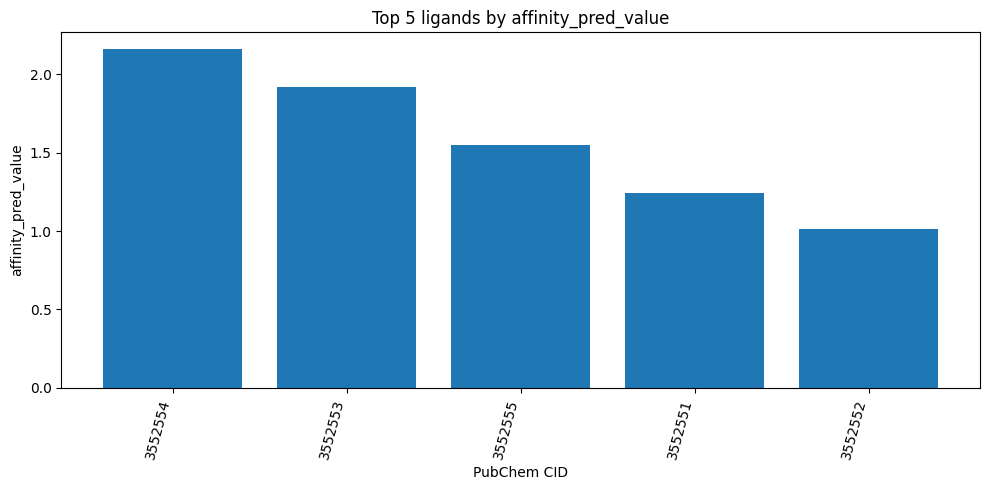

Saved: /content/boltz_runs_pubchem_batch/boltz_pubchem_batch_results.csv


In [8]:
# Try to auto-detect a numeric score column
meta_like = {"cid", "job_name", "smiles", "result_path"}
cand_cols = [c for c in results_df.columns if c not in meta_like]
num_cols = [c for c in cand_cols if pd.api.types.is_numeric_dtype(results_df[c])]
if not num_cols:
    raise ValueError("Couldn't find a numeric column to plot. Inspect results_df.head() to choose one.")
score_col = num_cols[0]
print("Using score column:", score_col)

# Top-N (optional)
TOP_N = min(20, len(results_df))
plot_df = results_df.sort_values(score_col, ascending=False).head(TOP_N)

plt.figure(figsize=(10, 5))
plt.bar(plot_df["cid"].astype(str), plot_df[score_col])
plt.xticks(rotation=75, ha="right")
plt.xlabel("PubChem CID")
plt.ylabel(score_col)
plt.title(f"Top {TOP_N} ligands by {score_col}")
plt.tight_layout()
plt.show()

# Save a tidy CSV for your repo / CV
csv_path = outroot / f"boltz_{BATCH_NAME}_results.csv"
results_df.to_csv(csv_path, index=False)
print("Saved:", csv_path)
